<a href="https://colab.research.google.com/github/kajoot/Human-vs-Horses/blob/main/Human_vs_Horses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

***Just Making directories***

In [ ]:
mkdir "/content/training"

In [ ]:
mkdir "/content/validation"

***Downloading and unziping data***

In [ ]:
import urllib.request

# Download Link 
url = "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip"
# where it will be dowloaded
file_name= "/content/training/human-or-horse.zip"
# Downloading the data from url in file_name
urllib.request.urlretrieve(url,file_name)

('/content/training/human-or-horse.zip',
 <http.client.HTTPMessage at 0x7f84094113d0>)

In [ ]:
import zipfile

# where the data will be unziped
training_dir="human-or-horse/Training"     
# Unziping file     
zip_ref = zipfile.ZipFile(file_name,"r")
# Extracting data
zip_ref.extractall(training_dir)
# Closing zip
zip_ref.close()

In [ ]:
import urllib.request

# Download Link 
url = "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip"
# where it will be dowloaded
file_name= "/content/validation/human-or-horse.zip"
# Downloading the data from url in file_name
urllib.request.urlretrieve(url,file_name)

('/content/validation/human-or-horse.zip',
 <http.client.HTTPMessage at 0x7f838841e0d0>)

In [ ]:
import zipfile

# where the data will be unziped
validation_dir="human-or-horse/Validation"     
# Unziping file       
zip_ref = zipfile.ZipFile(file_name,"r")
# Extracting data
zip_ref.extractall(validation_dir)
# Closing zip
zip_ref.close()

***Visualizing some images***

In [ ]:
import os

human_dir = '/content/human-or-horse/Training/humans'
horse_dir = '/content/human-or-horse/Training/horses'

human_names = os.listdir(human_dir)
horse_names = os.listdir(horse_dir)


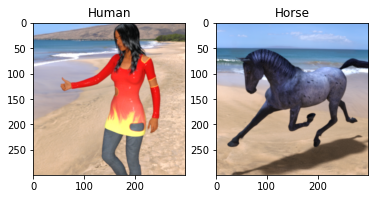

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# For Human Image
sp = plt.subplot(1,2,1)
img = mpimg.imread(os.path.join(human_dir,random.choice(human_names)))
plt.imshow(img)
plt.title("Human")
# For Horse Image
sp = plt.subplot(1,2,2)
img = mpimg.imread(os.path.join(horse_dir,random.choice(horse_names)))
plt.imshow(img)
plt.title("Horse")

plt.show()

***Model***

In [ ]:
model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(16,(3,3),input_shape=(150,150,3),activation="relu"),
            tf.keras.layers.MaxPooling2D(2,2),

            tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
            tf.keras.layers.MaxPooling2D(2,2),

            tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
            tf.keras.layers.MaxPooling2D(2,2),

            tf.keras.layers.Conv2D(128,(3,3),activation="relu"),
            tf.keras.layers.MaxPooling2D(2,2),
            
            tf.keras.layers.Conv2D(256,(3,3),activation="relu"),
            tf.keras.layers.MaxPooling2D(2,2),

            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128,activation="relu"),
            tf.keras.layers.Dense(1,activation="sigmoid"),
])
model.compile(
    loss="binary_crossentropy",
    optimizer =tf.keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=['accuracy'],
    )

Image Augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

training = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,  
    height_shift_range=0.2, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest",
)
validation = ImageDataGenerator(
    rescale=1./255,
)


Loading our data to be used 

In [ ]:
training_data = training.flow_from_directory(training_dir,target_size=(150,150),batch_size=60,class_mode='binary')
validation_data = validation.flow_from_directory(validation_dir,target_size=(150,150) ,batch_size=60,class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


Model Training

In [ ]:
classifier = model.fit(training_data,epochs=25,validation_data = validation_data )

Epoch 1/25
18/18 [==============================] - 14s 695ms/step - loss: 0.7057 - accuracy: 0.5316 - val_loss: 0.6793 - val_accuracy: 0.5000
Epoch 2/25
18/18 [==============================] - 12s 675ms/step - loss: 0.7093 - accuracy: 0.6056 - val_loss: 0.5357 - val_accuracy: 0.7422
Epoch 3/25
18/18 [==============================] - 12s 674ms/step - loss: 0.7101 - accuracy: 0.6680 - val_loss: 0.5589 - val_accuracy: 0.7266
Epoch 4/25
18/18 [==============================] - 12s 668ms/step - loss: 0.5871 - accuracy: 0.6972 - val_loss: 0.6404 - val_accuracy: 0.7617
Epoch 5/25
18/18 [==============================] - 12s 668ms/step - loss: 0.5440 - accuracy: 0.7439 - val_loss: 0.7337 - val_accuracy: 0.7422
Epoch 6/25
18/18 [==============================] - 12s 668ms/step - loss: 0.5053 - accuracy: 0.7595 - val_loss: 0.4001 - val_accuracy: 0.8438
Epoch 7/25
18/18 [==============================] - 12s 667ms/step - loss: 0.4820 - accuracy: 0.7585 - val_loss: 0.8235 - val_accuracy: 0.7422

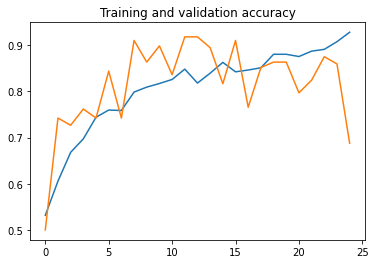

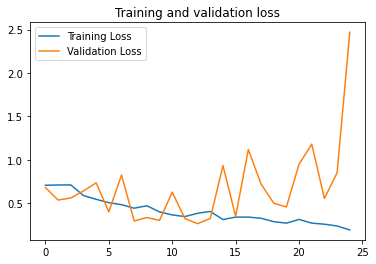

In [ ]:
  acc = classifier.history['accuracy']
  val_acc = classifier.history['val_accuracy']
  loss = classifier.history['loss']
  val_loss = classifier.history['val_loss']

  epochs = range(25)

  plt.plot(epochs, acc,  label='Training accuracy')
  plt.plot(epochs, val_acc, label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss,  label='Training Loss')
  plt.plot(epochs, val_loss,  label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

In [ ]:
from keras.preprocessing import image
from google.colab import files
import numpy as np

uploaded = files.upload()
 
path = os.path.join('/content/' , uploaded)
img = image.load_img(path, target_size=(300, 300))

x = image.img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = classifier.predict(images, batch_size=10)
    
if classes[0]>0.5:
  print(uploaded + " is a human")
else:
  print(uploaded + " is a horse")